In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Gọi thư viện 
import numpy as np 
import cv2 
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Lấy đường dẫn folder chứa ảnh
folder_dir = r"/content/gdrive/MyDrive/Teaching Assistant BKHN/week2/data/image"

# In ra có bao nhiêu ảnh trong cat folder
print("My image: {} images".format(len(os.listdir(folder_dir))))

My image: 18 images


(168, 301, 3)


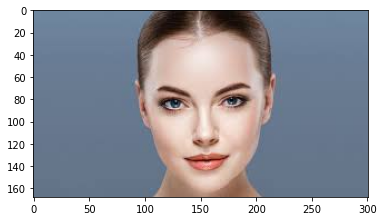

In [7]:
# Đọc ảnh
image = cv2.imread(os.path.join(folder_dir, "human2.jfif"))
# Do OpenCV đọc ảnh ở dạng BGR nên chúng ta dùng hàm cvtColor để chuyển sang RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Lấy size ảnh
print(image.shape)
# Hiển thị ảnh
plt.imshow(image)

In [8]:
# Chuyển shape của ma trận ảnh từ 3 chiều về 2 chiều
# Tạo 1 list chứa các data gồm 3 feature là red, green, blue 
image_px = []
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Do đây là ảnh RGB nên ở mỗi ô sẽ có 3 giá trị màu là red, green, blue
        red, green, blue = image[i, j] #--> (40, 50, 60,)
        # Chèn vào cuối list
        image_px.append([red, green, blue])
        
# Chuyển list sang dạng numpy array với loại của nó là float
image_px = np.array(image_px).astype(np.float32)
# In ra size của image_px
print(image_px.shape)
# Bảng data pixel
table = pd.DataFrame(image_px, columns=["red","green","blue"])
# Chuẩn hóa các đặc trưng về trong khoảng 0 đến 1 do mỗi pixel ảnh có giá trị lớn nhất của 1 kênh là 255 nên ta chia 255 (như MinMaxScaler trong sklearn)
image_px = image_px/255.0
# [-1, 1] --> x - 1/147.5 hoặc /255*2 - 1
# Hiển thị 10 samples trong table
table.head(10) 

(50568, 3)


,red,green,blue
0,110.0,134.0,158.0
1,110.0,134.0,158.0
2,110.0,134.0,158.0
3,110.0,134.0,158.0
4,110.0,134.0,158.0
5,110.0,134.0,158.0
6,110.0,134.0,158.0
7,110.0,134.0,158.0
8,109.0,133.0,157.0
9,109.0,133.0,157.0


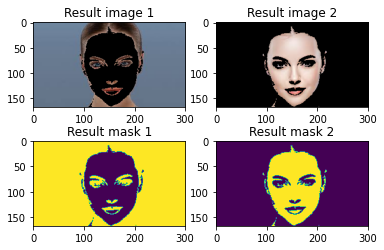

In [9]:
# Chúng ta sử dụng Kmeans để thử phân chia ảnh thành các vùng
# Ở đây chúng ta muốn lấy object ở trong ảnh chúng ta, ta có thể set n_clusters = 2 có nghĩa là 2 vùng: 1 vùng là pixel thuộc nền, 1 vùng là object
n_clusters = 2
# Gọi model với số cluster đã set bên trên và fit vào dữ liệu
kmean = KMeans(n_clusters=n_clusters).fit(image_px)
# Thực hiện predict: kết quả đầu ra là 1 ma trận chứa giá trị 0 và 1. 
clus = kmean.predict(image_px)
# clus = [0, 1, 0, 1]
# Tạo một ma trận cùng size với ảnh gốc 
final_image = np.zeros((image.shape[0], image.shape[1], 1))


row = 0
col = 0
for pixel in clus:
    if col >= image.shape[1]:
        col = 0
        row += 1
    final_image[row][col] = pixel
    col += 1

final_image0 = np.where(final_image==0, 255, 0)

"""
np.where(điều kiện, giá trị (nếu đúng), giá trị (nếu sai))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Do đây là ảnh RGB nên ở mỗi ô sẽ có 3 giá trị màu là red, green, blue
        gray = image[i, j] #--> 12
        if gray == 0: 
          image[i, j] = 255
        else:
          image[i, j] = 0
"""

final_image1 = np.where(final_image==1, 255, 0)
# Chuyển sang dạng uint8 để có thể nhân ảnh
final_image0 = np.uint8(final_image0)
final_image1 = np.uint8(final_image1)
# Thực hiện phép toán and giữa image và final_mask
re0 = cv2.bitwise_and(image, image, mask=final_image0)
re1 = cv2.bitwise_and(image, image, mask=final_image1)
# Show ảnh kết quả
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.imshow(re0)
ax1.set_title("Result image 1")
ax2.imshow(re1)
ax2.set_title("Result image 2")
ax3.imshow(final_image0.reshape((final_image0.shape[0], final_image0.shape[1])))
ax3.set_title("Result mask 1")
ax4.imshow(final_image1.reshape((final_image1.shape[0], final_image1.shape[1])))
ax4.set_title("Result mask 2")
plt.show()
